In [1]:
# Symbolic regression scrip to estimate mathematical expressions

#Importing libraries and packages
import pysr
import sympy
import numpy as np
from matplotlib import pyplot as plt
from pysr import PySRRegressor
import csv
import pandas as pd

#random seed for replication
np.random.seed(seed=29) #490 #42

# weightts for more robust model
weights = (1 / np.sqrt(0.01)) * np.ones((100,))

#import the saved results from PINN model, I included the results I used but can create and use different ones
df = pd.read_csv('f_NN_DPk_2.csv')
X = df.iloc[:, 0:2].to_numpy()
y = df.loc[:, 'f1'].to_numpy()


# Symbolic regression model 

model = PySRRegressor(
    niterations=500, 
    procs=8,
    loss="myloss(x, y, w) = w * abs(x - y)",
    populations=40,
    population_size=50,
    ncyclesperiteration=1000,
    binary_operators=["*", "+", "-"],
    #unary_operators=["exp"],  #can use other operations
    #extra_sympy_mappings={"inv": lambda x: 1 / x},
    #maxsize=10,
    model_selection="score",
    #complexity_of_operators={  
        #"*": 3},   #can introduce maximum complexity
    early_stop_condition=(
        "stop_if(loss, complexity) = loss < 1e-10 && complexity < 15"
    ),
)

# Run model:
#model = PySRRegressor.from_file("hall_of_fame_2024-01-17_155335.906.pkl")
model.fit(X, y, weights=weights)
y_pred = model.predict(X)
err = np.square(np.subtract(y,y_pred)).mean()

best_idx = model.equations_.query(
    f"loss < {2 * model.equations_.loss.min()}"
).score.idxmax()


print(f"Best model:", model.sympy(best_idx))

print(f"Projection Error: {err}")
print(f"Model: {model}")

print(f"Model SymPy: {model.sympy()}")

#print("4 model:", model.sympy(5))
print(f"Latex Equation: {model.latex()}")


Detected IPython. Loading juliacall extension. See https://juliapy.github.io/PythonCall.jl/stable/compat/#IPython


/home/federica/anaconda3/envs/PINN_v2/lib/python3.8/site-packages/pysr/sr.py:915: FutureWarning: `loss` has been renamed to `elementwise_loss` in PySRRegressor. Please use that instead.
  warnings.warn(
/home/federica/anaconda3/envs/PINN_v2/lib/python3.8/site-packages/pysr/sr.py:915: FutureWarning: `ncyclesperiteration` has been renamed to `ncycles_per_iteration` in PySRRegressor. Please use that instead.
  warnings.warn(
/home/federica/anaconda3/envs/PINN_v2/lib/python3.8/site-packages/pysr/sr.py:2582: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


Compiling Julia backend...


[ Info: Started!



Expressions evaluated per second: 3.710e+05
Head worker occupation: 11.0%
Progress: 393 / 20000 total iterations (1.965%)
Hall of Fame:
---------------------------------------------------------------------------------------------------
Complexity  Loss       Score     Equation
1           6.042e-01  1.594e+01  y = -1.2666
3           1.391e-01  7.344e-01  y = 0.0725 - x₁
5           2.470e-02  8.640e-01  y = 5.5219 - (x₀ * 6.4779)
7           1.242e-02  3.440e-01  y = (-0.45731 - (0.5835 * x₁)) * x₁
9           1.018e-02  9.920e-02  y = ((-0.27502 - (0.67413 * x₁)) * x₁) + -0.084532
11          7.847e-03  1.303e-01  y = -0.15378 - (x₁ * (x₁ - (x₁ * (x₁ * 0.11892))))
13          7.838e-03  5.658e-04  y = -0.15378 - (x₁ * (x₁ - (x₁ * ((x₁ * 1.005) * 0.11892))))
15          6.949e-03  6.015e-02  y = -0.1925 - ((x₁ - (x₁ * ((x₁ - 0.80053) * 0.17588))) * (x₁ ...
                                  + -0.12685))
19          6.215e-03  2.792e-02  y = -0.25377 - ((x₁ + -0.27464) * (x₁ - (0.24817

In [4]:
# These are the results using only the multiplaction, it is possible to obtain these results using only multiplication in the binary operators of the symbolic regression model 
# For simplicity I have saved them and imported them here to compare with the results obtained with also addition and subtraction
df1 = pd.read_csv('fdp_pred_mult.csv')
t= df1.loc[:, 't'].to_numpy()
fdp = df1.loc[:, 'fdp'].to_numpy()

### Plot of the two symbolic regression expressions obtained with different operators libraries

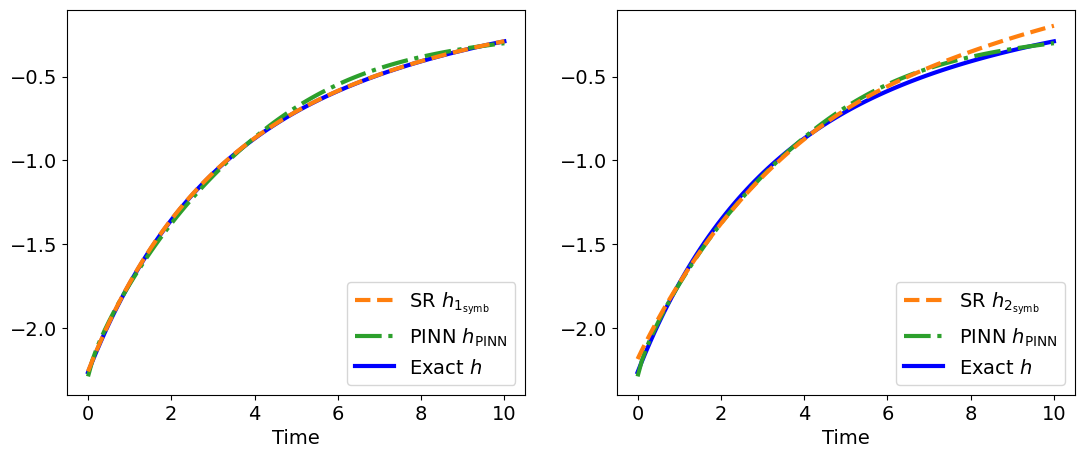

In [3]:
fig, ax = plt.subplots(1,2, figsize=(13, 5))
t = np.linspace(0, 10, 100).reshape(-1, 1)

color1 = 'tab:orange'
color2 = 'tab:green'
color3 = 'blue'

p=np.shape(t)
ep= np.arange(p[0])
lw = 3

ax[0].plot(t, fdp, color=color1, linestyle='--', linewidth = lw, zorder=2, label=r'SR $h_{1_{\mathrm{symb}}}$')
ax[0].plot(t, y, color=color2, linestyle='-.', linewidth = lw, zorder=1, label=r'PINN $h_{\mathrm{PINN}}$')
ax[0].plot(t, -X[:,0]**2*X[:,1], color=color3, linewidth = lw, zorder=0, label=r'Exact $h$')
ax[0].tick_params(axis='x', labelsize=14)
ax[0].tick_params(axis='y', labelsize=14)
ax[0].set_xlabel('Time', size=14)
ax[0].set_ylim(-2.4, -0.1)
ax[0].legend(fontsize=14, loc='lower right')

ax[1].plot(t, 5.5984817 - 6.542355*X[:,0], color=color1, linestyle='--', linewidth = lw, zorder=2, label=r'SR $h_{2_{\mathrm{symb}}}$')
ax[1].plot(t, y, color=color2, linestyle='-.', linewidth = lw, zorder=1, label=r'PINN $h_{\mathrm{PINN}}$')
ax[1].plot(t, -X[:,0]**2*X[:,1], color=color3, linewidth = lw, zorder=0, label=r'Exact $h$')
ax[1].tick_params(axis='x', labelsize=14)
ax[1].tick_params(axis='y', labelsize=14)
ax[1].set_xlabel('Time', size=14)
ax[1].set_ylim(-2.4, -0.1)
ax[1].legend(fontsize=14, loc='lower right')
#plt.savefig('' + 'sr_pinns_exact_both' + '.pdf', format="pdf", bbox_inches="tight")

### Errors

In [5]:
Exact = -X[:,0]**2*X[:,1]
error_pinn = np.linalg.norm(Exact-y,2)/np.linalg.norm(Exact,2)
error_sr_mult = np.linalg.norm(Exact-fdp,2)/np.linalg.norm(Exact,2)
error_sr_multadd = np.linalg.norm(Exact-y_pred,2)/np.linalg.norm(Exact,2)
print(error_pinn)
print(error_sr_mult)
print(error_sr_multadd)

0.02263423501468102
0.0022590000000000565
0.040970825321079846


In [7]:
error_u1 = np.linalg.norm(y-(-X[:,1]*X[:,0]**2),2)/np.linalg.norm(y,2)
print('Error u1: %e' %(error_u1)) 

Error u1: 2.270192e-02


In [8]:
error_u2 = np.linalg.norm(y-y_pred,2)/np.linalg.norm(y,2)
print('Error u2: %e' %(error_u2)) 

Error u2: 3.414355e-02
